In [1]:
%matplotlib inline

In [2]:
#Modified from the example written by yhat that can be found here:
#http://blog.yhathq.com/posts/random-forests-in-python.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

train, test = df[df['is_train'] == True], df[df['is_train'] == False]
features = df.columns[0:4]
y, _ = pd.factorize(train['species'])

In [3]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(train[features], y)

preds = iris.target_names[tree.predict(test[features])]
pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,17,0,0
versicolor,0,11,2
virginica,0,1,12


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris_tree.dot",
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True,
               filled=True)

In [5]:
!dot -Tpng iris_tree.dot -o iris_tree.png

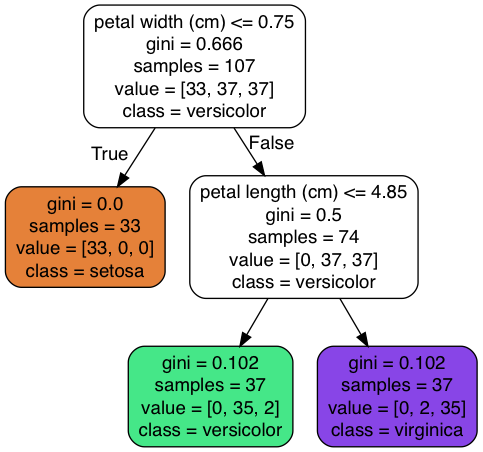

In [6]:
from IPython.display import Image
Image('iris_tree.png')

In [7]:
forest = RandomForestClassifier(n_jobs=2, n_estimators=50)
forest.fit(train[features], y)

preds = iris.target_names[forest.predict(test[features])]
pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,17,0,0
versicolor,0,12,1
virginica,0,0,13


In [8]:
importances = forest.feature_importances_
indices = np.argsort(importances)

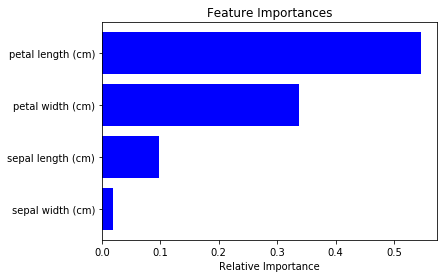

In [9]:
#plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');